In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

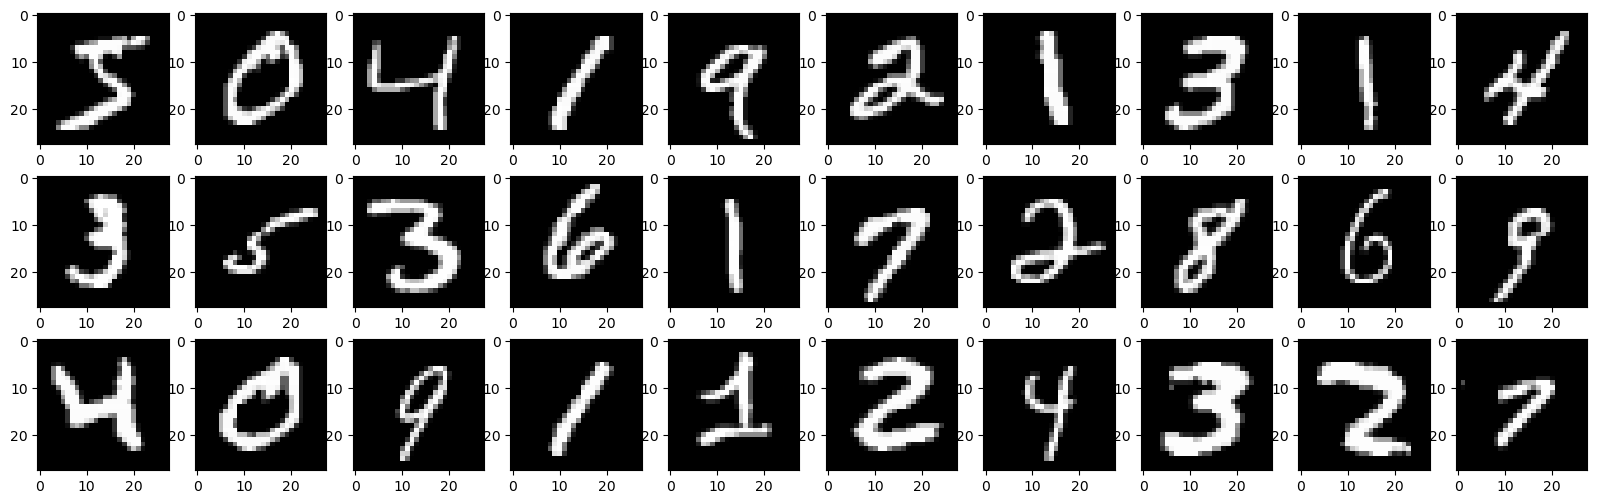

In [3]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")

In [4]:
X_dev = X_dev.reshape(X_dev.shape[0],X_dev.shape[1]*X_dev.shape[2])

In [5]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

In [7]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='softmax')(skjult_lag)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [8]:
X_train.shape[1]

784

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
model = dnn(X_train.shape[1],y_train.shape[1])

In [11]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [12]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/15
750/750 [==============================] - 8s 10ms/step - loss: 4.2643 - categorical_accuracy: 0.9141 - auc: 0.9612 - val_loss: 0.5849 - val_categorical_accuracy: 0.9412 - val_auc: 0.9812
Epoch 2/15
750/750 [==============================] - 7s 10ms/step - loss: 0.3701 - categorical_accuracy: 0.9544 - auc: 0.9867 - val_loss: 0.4699 - val_categorical_accuracy: 0.9476 - val_auc: 0.9845
Epoch 3/15
750/750 [==============================] - 10s 14ms/step - loss: 0.3403 - categorical_accuracy: 0.9576 - auc: 0.9881 - val_loss: 0.6911 - val_categorical_accuracy: 0.9352 - val_auc: 0.9785
Epoch 4/15
750/750 [==============================] - 10s 13ms/step - loss: 0.3980 - categorical_accuracy: 0.9572 - auc: 0.9871 - val_loss: 0.4900 - val_categorical_accuracy: 0.9567 - val_auc: 0.9858
Epoch 5/15
750/750 [==============================] - 10s 14ms/step - loss: 0.3074 - categorical_accuracy: 0.9638 - auc: 0.9898 - val_loss: 0.4920 - val_categorical_accuracy: 0.9553 - val_auc: 0.9852
Ep

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7908 - categorical_accuracy: 0.9643 - auc: 0.9858


[0.7908298373222351, 0.9642999768257141, 0.9857742190361023]

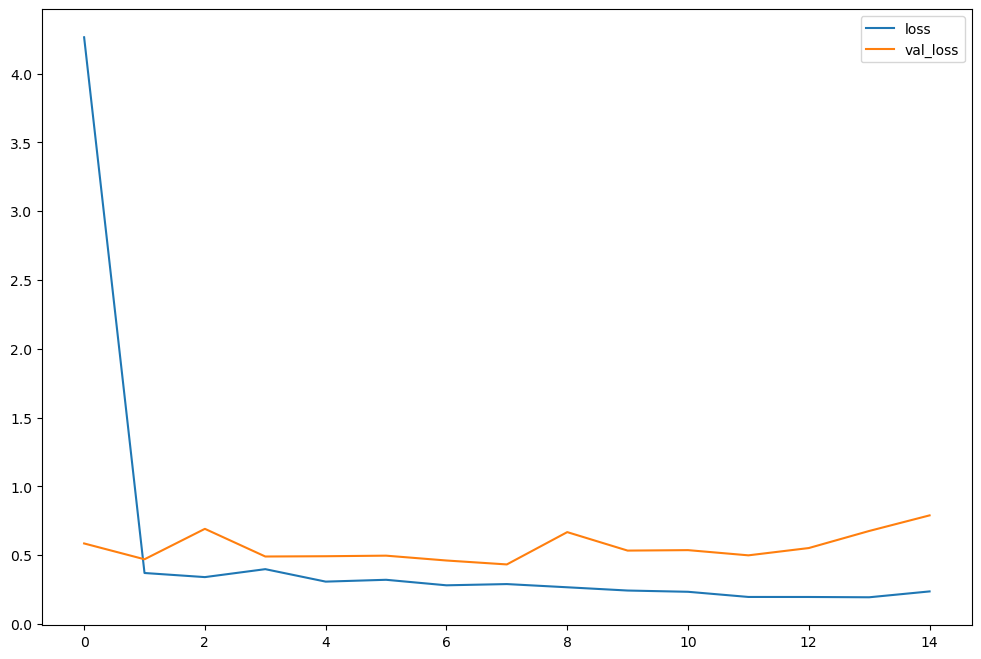

In [14]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

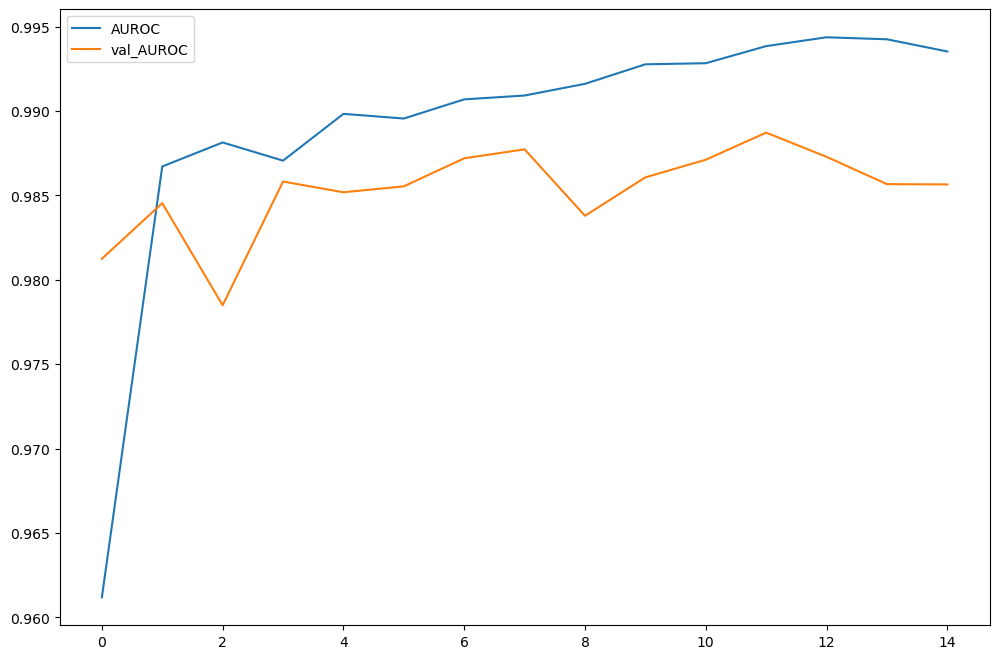

In [15]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()